In [8]:
import os
import cv2
import numpy as np

#Encoding and Split data into Train/Test Sets
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

#Tensorflow Keras CNN Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop

#Plot Images
import matplotlib.pyplot as plt


dataset = r'/Users/dammy/Downloads/flowers'

In [9]:
#Now the next step is to read each image in the data and create a label for each with the name of the folder
data = []
label = []

SIZE = 128 #Crop the image to 128x128

for folder in os.listdir(dataset):
    for file in os.listdir(os.path.join(dataset, folder)): #select the folder inside dataset directory 
        if file.endswith("jpg"):
            label.append(folder) # use the foldaer name as label
            img = cv2.imread(os.path.join(dataset, folder, file)) # selct the file inside folder from the dateset direcotory
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #Using cv2.COLOR_BGR2RGB color space conversion
            im = cv2.resize(img_rgb, (SIZE,SIZE)) # resizing the image in the color conversion
            data.append(im) # use the image file name as data
        else:
            continue

In [10]:
#Now let’s convert the data into numerical values
data_arr = np.array(data)
label_arr = np.array(label)


In [11]:
#Now let’s use the Label encoder and normalize the data
encoder = LabelEncoder()
y = encoder.fit_transform(label_arr)
y = to_categorical(y,5)
X = data_arr/255

In [14]:
#The next step is to split the dataset into 80% training and 20% test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)

In [15]:
#Now let’s build a neural network model for the task of Flower Recognition
model = Sequential()
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu', input_shape = (SIZE,SIZE,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(5, activation = "softmax"))

2022-03-28 16:14:33.943210: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [16]:
#Before compiling the model we need to create more training images to prevent overfitting
datagen = ImageDataGenerator(
        rotation_range=20,
        zoom_range = 0.20,
        width_shift_range=0.3,
        height_shift_range=0.3,
        horizontal_flip=True,
        vertical_flip=True)

datagen.fit(X_train)

In [17]:
#Now let’s compile the neural network model
model.compile(optimizer=Adam(lr=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])
batch_size=32
epochs=64
history = model.fit_generator(datagen.flow(X_train,y_train, batch_size=batch_size),
                              epochs = epochs,
                              validation_data = (X_test,y_test),
                              verbose = 1)

/opt/anaconda3/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
/var/folders/9k/jx2_vf913ql12vbjw0wpd3_w0000gn/T/ipykernel_2804/2942619245.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagen.flow(X_train,y_train, batch_size=batch_size),


Epoch 1/64
108/108 [==============================] - 2088s 19s/step - loss: 1.5062 - accuracy: 0.2945 - val_loss: 1.2997 - val_accuracy: 0.4387
Epoch 2/64
108/108 [==============================] - 17435s 163s/step - loss: 1.3495 - accuracy: 0.3994 - val_loss: 1.2306 - val_accuracy: 0.4722
Epoch 3/64
108/108 [==============================] - 748s 7s/step - loss: 1.2740 - accuracy: 0.4338 - val_loss: 1.1687 - val_accuracy: 0.5104
Epoch 4/64
108/108 [==============================] - 47013s 439s/step - loss: 1.2433 - accuracy: 0.4547 - val_loss: 1.1030 - val_accuracy: 0.5498
Epoch 5/64
108/108 [==============================] - 742s 7s/step - loss: 1.1904 - accuracy: 0.5007 - val_loss: 1.1100 - val_accuracy: 0.5556
Epoch 6/64
108/108 [==============================] - 3139s 29s/step - loss: 1.1527 - accuracy: 0.5216 - val_loss: 1.0872 - val_accuracy: 0.5475
Epoch 7/64
108/108 [==============================] - 44257s 414s/step - loss: 1.1218 - accuracy: 0.5520 - val_loss: 1.0092 - val_

108/108 [==============================] - 1014s 9s/step - loss: 0.6728 - accuracy: 0.7460 - val_loss: 0.6895 - val_accuracy: 0.7627
Epoch 58/64
108/108 [==============================] - 400s 4s/step - loss: 0.6779 - accuracy: 0.7588 - val_loss: 0.6832 - val_accuracy: 0.7593
Epoch 59/64
108/108 [==============================] - 394s 4s/step - loss: 0.6738 - accuracy: 0.7559 - val_loss: 0.7653 - val_accuracy: 0.7245
Epoch 60/64
108/108 [==============================] - 382s 4s/step - loss: 0.6606 - accuracy: 0.7611 - val_loss: 0.8244 - val_accuracy: 0.7118
Epoch 61/64
108/108 [==============================] - 3028s 28s/step - loss: 0.6638 - accuracy: 0.7660 - val_loss: 0.6899 - val_accuracy: 0.7685
Epoch 62/64
108/108 [==============================] - 5886s 55s/step - loss: 0.6628 - accuracy: 0.7567 - val_loss: 0.6848 - val_accuracy: 0.7465
Epoch 63/64
108/108 [==============================] - 11045s 103s/step - loss: 0.6504 - accuracy: 0.7619 - val_loss: 0.6489 - val_accuracy: 0.

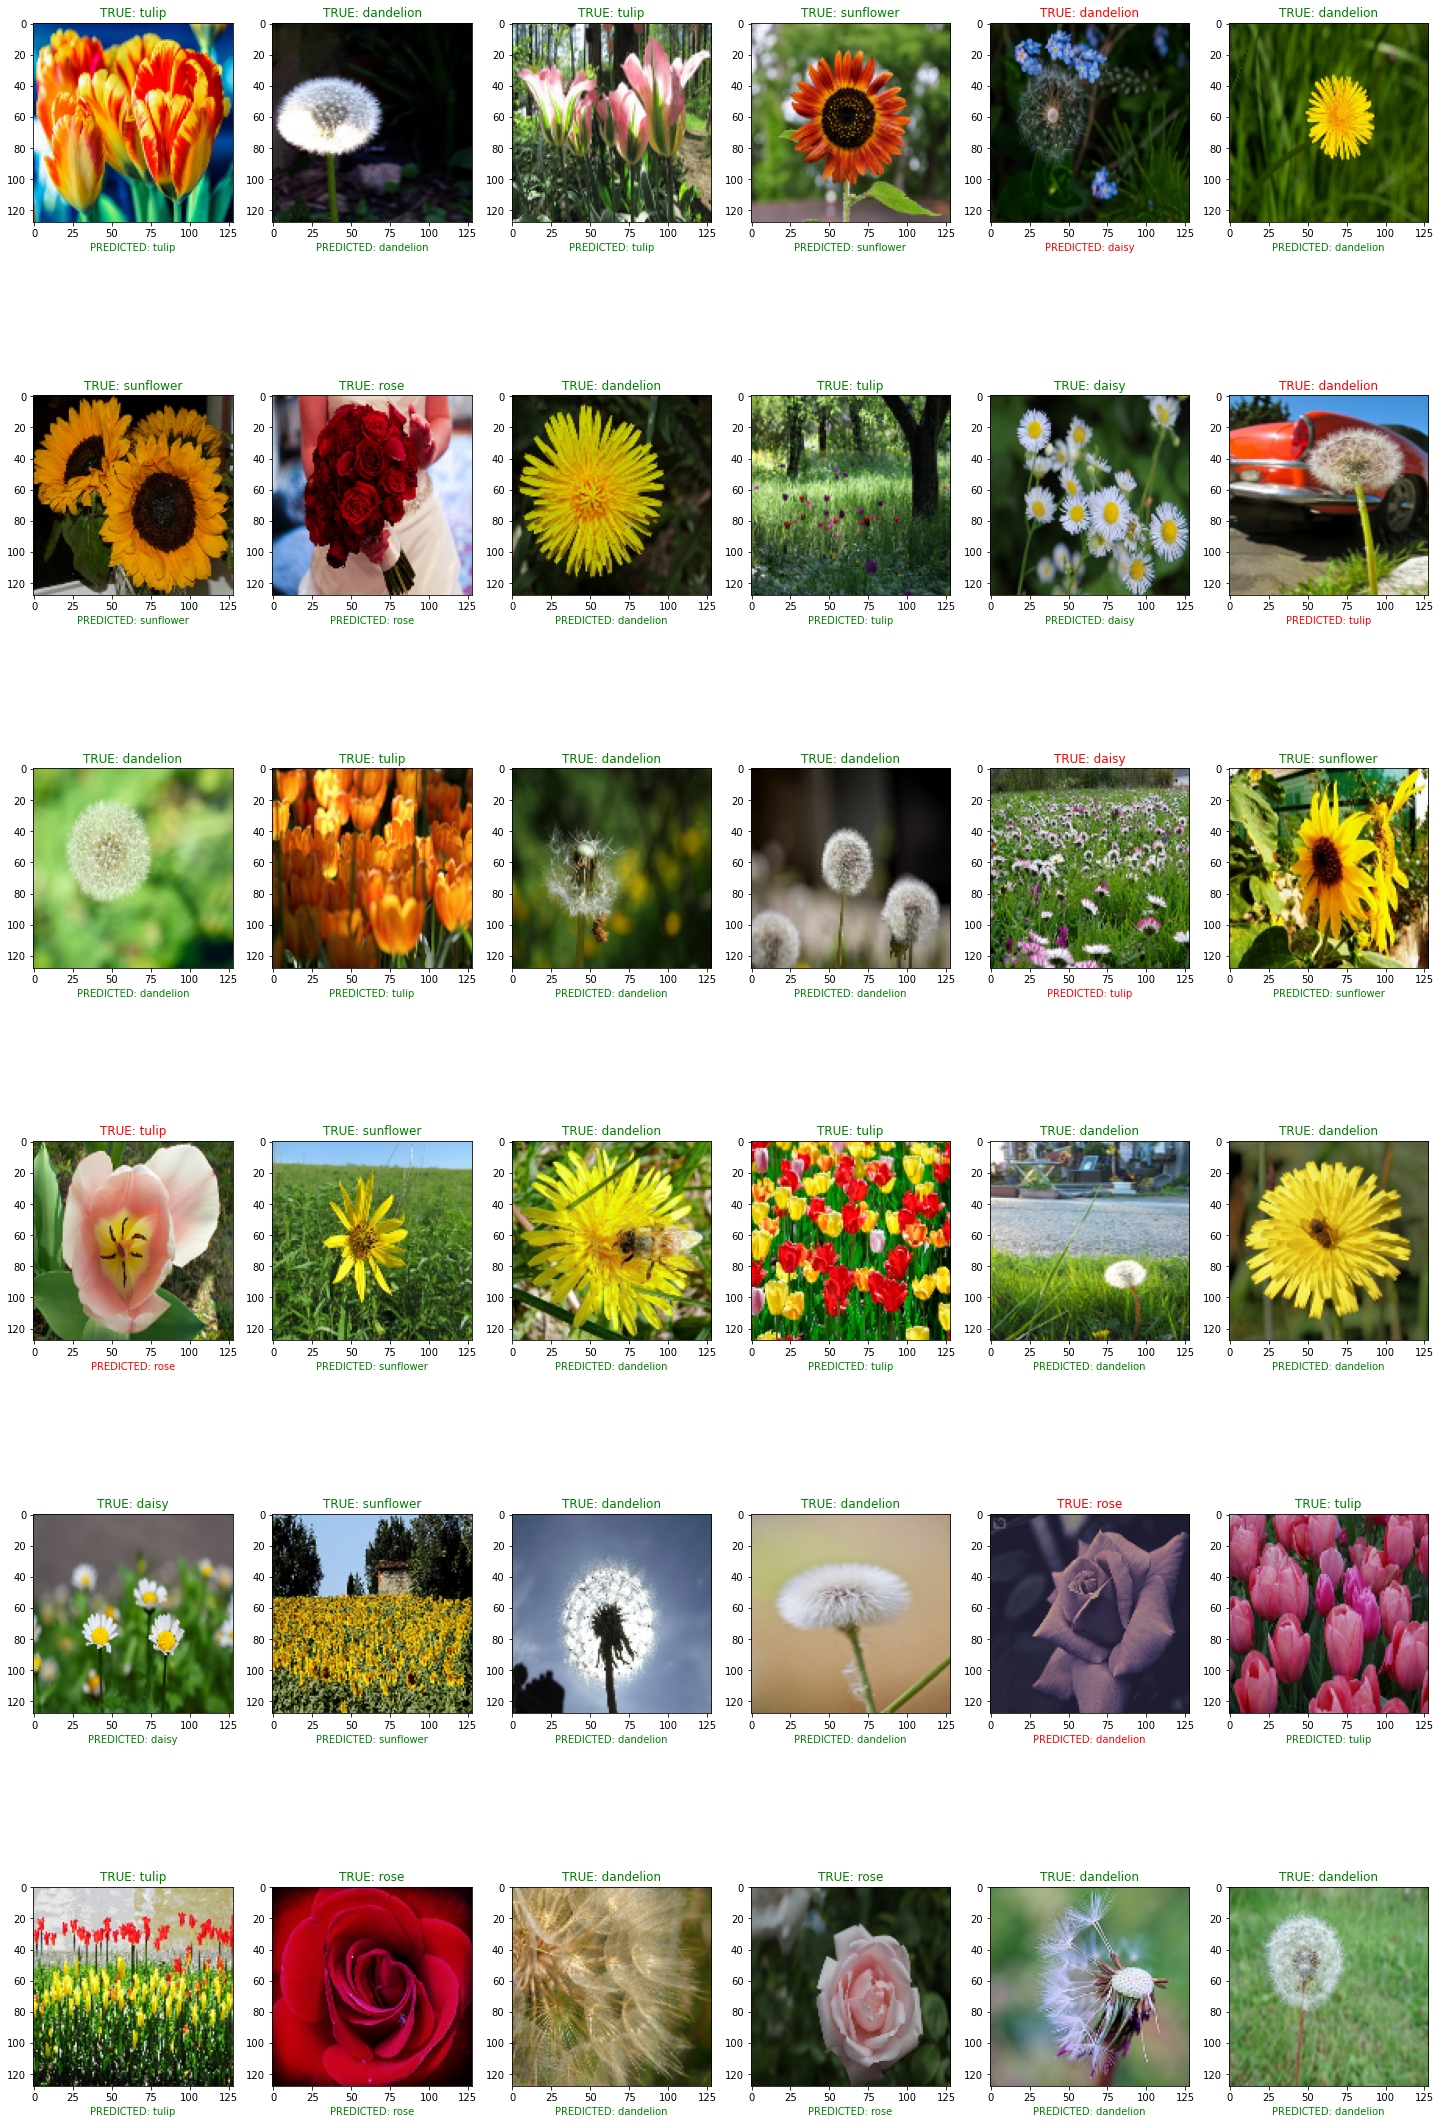

In [19]:
#Now let’s let the model if it recognize flowers properly
categories = np.sort(os.listdir(dataset))
fig, ax = plt.subplots(6,6, figsize=(25, 40))

for i in range(6):
    for j in range(6):
        k = int(np.random.random_sample() * len(X_test))
        if(categories[np.argmax(y_test[k])] == categories[np.argmax(model.predict(X_test)[k])]):
            ax[i,j].set_title("TRUE: " + categories[np.argmax(y_test[k])], color='green')
            ax[i,j].set_xlabel("PREDICTED: " + categories[np.argmax(model.predict(X_test)[k])], color='green')
            ax[i,j].imshow(np.array(X_test)[k].reshape(SIZE, SIZE, 3), cmap='gray')
        else:
            ax[i,j].set_title("TRUE: " + categories[np.argmax(y_test[k])], color='red')
            ax[i,j].set_xlabel("PREDICTED: " + categories[np.argmax(model.predict(X_test)[k])], color='red')
            ax[i,j].imshow(np.array(X_test)[k].reshape(SIZE, SIZE, 3), cmap='gray')